In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
from matplotlib.ticker import ScalarFormatter,FormatStrFormatter

In [3]:
from plot_config import *

In [4]:
from utils import *

In [5]:
rerun = False
regen_talk = False

In [6]:
limit = 1825

In [7]:
just_for_time = '/sciserver/filedb10-01/ocean/wenrui_temp/vol_budget'

rtime = np.array(xr.open_zarr(just_for_time).time)

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.38.0 or higher is recommended. You are running version 2.23.0
  warnings.warn(


In [8]:
if rerun:
    for which in ['domain_all','domain4']:
        if which == 'domain_all':
            ds = open_domain_all()
        elif which == 'domain4':
            ds = open_domain4()
        
        # %%time
        terms = {}
        for var in rhs_list:
            terms[var] = [0]
        for i in range(1,len(rtime),1):
            print(i,end = ' ')
            length = np.minimum(i+1,limit)
            stupid_xr_vec = xr.DataArray(np.arange(length), dims = 'stupid')
            for var in rhs_list:
                slc = ds[var][i-stupid_xr_vec,stupid_xr_vec]
                terms[var].append(np.nansum(slc))
        
        to_output = xr.Dataset()
        for var in terms.keys():
            to_output[var] = xr.DataArray(terms[var],dims = 'dummy')
        to_output.to_zarr(f'lineplotprep/contr_{which}')
        
        indices = np.arange(1,len(rtime),1)
        slast = np.array(ds.sl[:,0])[indices]
        sfirst = np.zeros_like(slast)
        part1992 = indices[indices<limit]
        part5yr = indices[indices>=limit]
        sfirst[:len(part1992)] = np.array(ds.sf[0,:])[part1992]
        sfirst[-len(part5yr):] = np.array(ds.sf[:,limit-1])[part5yr - limit]
        
        for var in rhs_list:
            terms[var] = np.array(terms[var])
        
        sums = np.zeros_like(terms['A'])
        for var in rhs_list:
            sums+= np.array(terms[var])
        
        np.save(f'lineplotprep/contr_slast_{which}.npy',slast)
        np.save(f'lineplotprep/contr_sfirst_{which}.npy',sfirst)
        np.save(f'lineplotprep/contr_sums_{which}.npy',sums)

In [9]:
t = rtime[1:]

In [10]:
def terms_from_file(filename):
    termds = xr.open_zarr(filename)
    terms = {}
    for var in termds.data_vars:
        terms[var] = np.array(termds[var])
    return terms

In [11]:
terms4 = terms_from_file('lineplotprep/contr_domain4')
slast4 = np.load('lineplotprep/contr_slast_domain4.npy')
sfirst4 = np.load('lineplotprep/contr_sfirst_domain4.npy')
sums4 = np.load('lineplotprep/contr_sums_domain4.npy')

termsa = terms_from_file('lineplotprep/contr_domain_all')
slasta = np.load('lineplotprep/contr_slast_domain_all.npy')
sfirsta = np.load('lineplotprep/contr_sfirst_domain_all.npy')
sumsa = np.load('lineplotprep/contr_sums_domain_all.npy')

In [12]:
salty_date = rtime[salty_idate]
fresh_date = rtime[fresh_idate]

In [13]:
mm = 1/25.4

In [14]:
plt.rcParams['lines.linewidth'] = 0.7

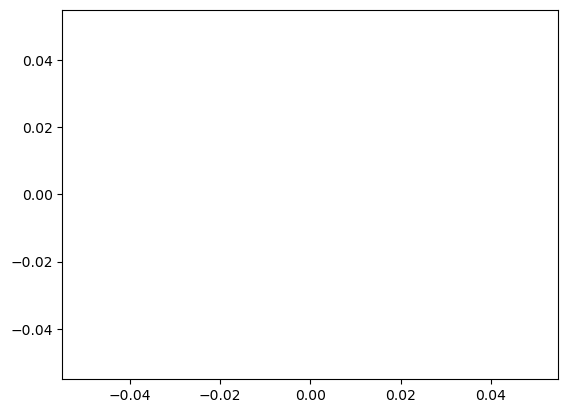

In [15]:
empty_handle, = plt.plot(np.zeros(2), np.zeros(2), color='w', alpha=0, label=' ')

In [16]:
# ttt = rtime
# fig,axs = plt.subplots(2,4, figsize = (180*mm,90*mm),sharex = True)
# fontsize = 7
# axs = axs.ravel()
# ylim = 0.3
# small_ylim = 0.02

# axs[0].plot(t,slast4,label = 'final salinity')
# axs[0].plot(t,sfirst4, label = 'initial salinity',alpha = 0.5)
# axs[0].plot(t,-sums4[1:]/NUMBER_OF_PARTICLE_domain4, label = 'term contribution')
# axs[0].plot(t,slast4-sfirst4+sums4[1:]/NUMBER_OF_PARTICLE_domain4,label = 'Error',alpha = 0.2)
# # axs[0].legend(fontsize = fontsize)
# axs[0].fill_betweenx([-ylim,ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
# axs[0].set_ylim([-ylim,ylim])
# axs[0].set_xlim([t[0],t[-1]])
# axs[0].plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
# axs[0].plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)

# for i,group in enumerate([['E','A'],['dif_h','dif_v','F'],['e_ua','I']]):
#     for var in group:
#         axs[i+1].plot(ttt, -terms4[var]/NUMBER_OF_PARTICLE_domain4,label = term_dic[var],color = color_dic[var])
#     # axs[i+1].legend(fontsize = fontsize)
#     if i!=2:
#         axs[i+1].fill_betweenx([-ylim,ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
#         axs[i+1].set_ylim([-ylim,ylim])
#         axs[i+1].plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
#         axs[i+1].plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)
#     else:
#         axs[i+1].fill_betweenx([-small_ylim,small_ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
#         axs[i+1].set_ylim([-small_ylim,small_ylim])
#         axs[i+1].set_yticks(np.arange(-small_ylim,small_ylim+0.01,0.01))
#         axs[i+1].plot([salty_date,salty_date],[-small_ylim,small_ylim],'--', color = salty_theme_color)
#         axs[i+1].plot([fresh_date,fresh_date],[-small_ylim,small_ylim],'--', color = fresh_theme_color)

# ylim = 0.15
# small_ylim = 0.01

# labels = []
# handles = []

# axs[4].plot(t,slasta,label = 'final salinity')
# axs[4].plot(t,sfirsta, label = 'initial salinity',alpha = 0.5)
# axs[4].plot(t,-sumsa[1:]/NUMBER_OF_PARTICLE_domain_all, label = 'term contribution')
# axs[4].plot(t,slasta-sfirsta+sumsa[1:]/NUMBER_OF_PARTICLE_domain_all,label = 'Error',alpha = 0.2)
# # axs[4].legend(fontsize = fontsize)
# h, l = axs[0].get_legend_handles_labels()
# handles.extend(h)
# labels.extend(l)
# axs[4].fill_betweenx([-ylim,ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
# axs[4].set_ylim([-ylim,ylim])
# axs[4].set_xlim([t[0],t[-1]])
# axs[4].plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
# axs[4].plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)

# for i,group in enumerate([['E','A'],['dif_h','dif_v','F'],['e_ua','I']]):
#     i+=4
#     for var in group:
#         axs[i+1].plot(ttt, -termsa[var]/NUMBER_OF_PARTICLE_domain_all,label = term_dic[var],color = color_dic[var])
#     # axs[i+1].legend(fontsize = fontsize)
#     h, l = axs[i+1].get_legend_handles_labels()
#     handles.extend(h+[empty_handle for i in range(4-len(h))])
#     labels.extend(l+[' ' for i in range(4-len(h))])
#     if i!=6:
#         axs[i+1].fill_betweenx([-ylim,ylim],t[0],t[1825],**fill_betweenx_kwarg)
#         axs[i+1].set_ylim([-ylim,ylim])
#         axs[i+1].plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
#         axs[i+1].plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)
#     else:
#         axs[i+1].fill_betweenx([-small_ylim,small_ylim],t[0],t[1825],**fill_betweenx_kwarg)
#         axs[i+1].set_ylim([-small_ylim,small_ylim])
#         axs[i+1].set_yticks(np.arange(-small_ylim,small_ylim+0.01,0.01))
#         axs[i+1].plot([salty_date,salty_date],[-small_ylim,small_ylim],'--', color = salty_theme_color)
#         axs[i+1].plot([fresh_date,fresh_date],[-small_ylim,small_ylim],'--', color = fresh_theme_color)

# for i,ax in enumerate(axs):
#     ax.tick_params(labelsize=5)
#     ax.set_title(f'({chr(97+i)})',loc = 'left',fontsize = 7,pad = 4)
#     ax.tick_params(length=1)
#     ax.plot(t,np.zeros(len(t)),'k--',alpha = 0.3)

# plt.tight_layout()
# fig.subplots_adjust(wspace=0.23, hspace=0.15,bottom = 0.23)

# fig.legend(handles, labels, loc='lower center', ncol=4,fontsize = 6)
# plt.savefig('contr_plot.pdf',dpi = 300)

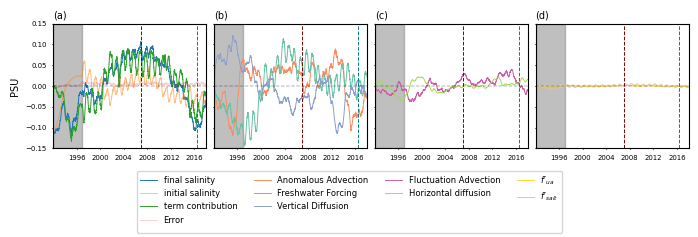

In [17]:
ttt = rtime
fig,axs = plt.subplots(1,4, figsize = (180*mm,60*mm),sharey = True,sharex = True)
fontsize = 7
axs = axs.ravel()
# ylim = 0.3
# small_ylim = 0.02

# axs[0].plot(t,slast4,label = 'final salinity')
# axs[0].plot(t,sfirst4, label = 'initial salinity',alpha = 0.5)
# axs[0].plot(t,-sums4[1:]/NUMBER_OF_PARTICLE_domain4, label = 'term contribution')
# axs[0].plot(t,slast4-sfirst4+sums4[1:]/NUMBER_OF_PARTICLE_domain4,label = 'Error',alpha = 0.2)
# # axs[0].legend(fontsize = fontsize)
# axs[0].fill_betweenx([-ylim,ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
# axs[0].set_ylim([-ylim,ylim])
# axs[0].set_xlim([t[0],t[-1]])
# axs[0].plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
# axs[0].plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)

# for i,group in enumerate([['E','A'],['dif_h','dif_v','F'],['e_ua','I']]):
#     for var in group:
#         axs[i+1].plot(ttt, -terms4[var]/NUMBER_OF_PARTICLE_domain4,label = term_dic[var],color = color_dic[var])
#     # axs[i+1].legend(fontsize = fontsize)
#     if i!=2:
#         axs[i+1].fill_betweenx([-ylim,ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
#         axs[i+1].set_ylim([-ylim,ylim])
#         axs[i+1].plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
#         axs[i+1].plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)
#     else:
#         axs[i+1].fill_betweenx([-small_ylim,small_ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
#         axs[i+1].set_ylim([-small_ylim,small_ylim])
#         axs[i+1].set_yticks(np.arange(-small_ylim,small_ylim+0.01,0.01))
#         axs[i+1].plot([salty_date,salty_date],[-small_ylim,small_ylim],'--', color = salty_theme_color)
#         axs[i+1].plot([fresh_date,fresh_date],[-small_ylim,small_ylim],'--', color = fresh_theme_color)

ylim = 0.15
# small_ylim = 0.01

labels = []
handles = []

axs[0].plot(t,slasta,label = 'final salinity')
axs[0].plot(t,sfirsta, label = 'initial salinity',alpha = 0.5)
axs[0].plot(t,-sumsa[1:]/NUMBER_OF_PARTICLE_domain_all, label = 'term contribution')
axs[0].plot(t,slasta-sfirsta+sumsa[1:]/NUMBER_OF_PARTICLE_domain_all,label = 'Error',alpha = 0.2)
# axs[4].legend(fontsize = fontsize)
h, l = axs[0].get_legend_handles_labels()
handles.extend(h)
labels.extend(l)
axs[0].fill_betweenx([-ylim,ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
axs[0].set_ylim([-ylim,ylim])
axs[0].set_xlim([t[0],t[-1]])
axs[0].plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
axs[0].plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)
axs[0].set_ylabel('PSU',fontsize = 7)

for i,group in enumerate([['A','F','dif_v'],['E','dif_h'],['e_ua','I']]):
    # i+=4
    for var in group:
        axs[i+1].plot(ttt, -termsa[var]/NUMBER_OF_PARTICLE_domain_all,label = term_dic[var],color = color_dic_mean[var])
    # axs[i+1].legend(fontsize = fontsize)
    h, l = axs[i+1].get_legend_handles_labels()
    handles.extend(h+[empty_handle for i in range(4-len(h))])
    labels.extend(l+[' ' for i in range(4-len(h))])
    if i!=6:
        axs[i+1].fill_betweenx([-ylim,ylim],t[0],t[1825],**fill_betweenx_kwarg)
        axs[i+1].set_ylim([-ylim,ylim])
        axs[i+1].plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
        axs[i+1].plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)
    else:
        axs[i+1].fill_betweenx([-small_ylim,small_ylim],t[0],t[1825],**fill_betweenx_kwarg)
        # axs[i+1].set_ylim([-small_ylim,small_ylim])
        axs[i+1].set_yticks(np.arange(-small_ylim,small_ylim+0.01,0.01))
        axs[i+1].axvline(salty_date,linestyle = '--', color = salty_theme_color)
        axs[i+1].axvline(fresh_date,linestyle = '--', color = fresh_theme_color)
        # axs[i+1].plot([salty_date,salty_date],[-small_ylim,small_ylim],'--', color = salty_theme_color)
        # axs[i+1].plot([fresh_date,fresh_date],[-small_ylim,small_ylim],'--', color = fresh_theme_color)

for i,ax in enumerate(axs):
    ax.tick_params(labelsize=5)
    ax.set_title(f'({chr(97+i)})',loc = 'left',fontsize = 7,pad = 4)
    ax.tick_params(length=1)
    ax.plot(t,np.zeros(len(t)),'k--',alpha = 0.3)

plt.tight_layout()
fig.subplots_adjust(wspace=0.05, hspace=0.15,bottom = 0.35)

fig.legend(handles, labels, loc='lower center', ncol=4,fontsize = 6)
plt.savefig('contr_plot.pdf',dpi = 300)

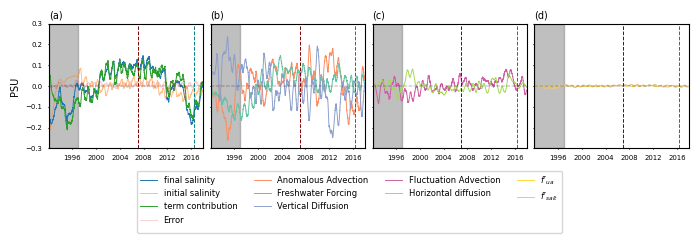

In [18]:
ttt = rtime
fig,axs = plt.subplots(1,4, figsize = (180*mm,60*mm),sharey = True,sharex = True)
fontsize = 7
axs = axs.ravel()
# ylim = 0.3
# small_ylim = 0.02

# axs[0].plot(t,slast4,label = 'final salinity')
# axs[0].plot(t,sfirst4, label = 'initial salinity',alpha = 0.5)
# axs[0].plot(t,-sums4[1:]/NUMBER_OF_PARTICLE_domain4, label = 'term contribution')
# axs[0].plot(t,slast4-sfirst4+sums4[1:]/NUMBER_OF_PARTICLE_domain4,label = 'Error',alpha = 0.2)
# # axs[0].legend(fontsize = fontsize)
# axs[0].fill_betweenx([-ylim,ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
# axs[0].set_ylim([-ylim,ylim])
# axs[0].set_xlim([t[0],t[-1]])
# axs[0].plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
# axs[0].plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)

# for i,group in enumerate([['E','A'],['dif_h','dif_v','F'],['e_ua','I']]):
#     for var in group:
#         axs[i+1].plot(ttt, -terms4[var]/NUMBER_OF_PARTICLE_domain4,label = term_dic[var],color = color_dic[var])
#     # axs[i+1].legend(fontsize = fontsize)
#     if i!=2:
#         axs[i+1].fill_betweenx([-ylim,ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
#         axs[i+1].set_ylim([-ylim,ylim])
#         axs[i+1].plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
#         axs[i+1].plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)
#     else:
#         axs[i+1].fill_betweenx([-small_ylim,small_ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
#         axs[i+1].set_ylim([-small_ylim,small_ylim])
#         axs[i+1].set_yticks(np.arange(-small_ylim,small_ylim+0.01,0.01))
#         axs[i+1].plot([salty_date,salty_date],[-small_ylim,small_ylim],'--', color = salty_theme_color)
#         axs[i+1].plot([fresh_date,fresh_date],[-small_ylim,small_ylim],'--', color = fresh_theme_color)

ylim = 0.3
# small_ylim = 0.01

labels = []
handles = []

axs[0].plot(t,slast4,label = 'final salinity')
axs[0].plot(t,sfirst4, label = 'initial salinity',alpha = 0.5)
axs[0].plot(t,-sums4[1:]/NUMBER_OF_PARTICLE_domain4, label = 'term contribution')
axs[0].plot(t,slast4-sfirst4+sums4[1:]/NUMBER_OF_PARTICLE_domain4,label = 'Error',alpha = 0.2)
# axs[4].legend(fontsize = fontsize)
h, l = axs[0].get_legend_handles_labels()
handles.extend(h)
labels.extend(l)
axs[0].fill_betweenx([-ylim,ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
axs[0].set_ylim([-ylim,ylim])
axs[0].set_xlim([t[0],t[-1]])
axs[0].plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
axs[0].plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)
axs[0].set_ylabel('PSU',fontsize = 7)

for i,group in enumerate([['A','F','dif_v'],['E','dif_h'],['e_ua','I']]):
    # i+=4
    for var in group:
        axs[i+1].plot(ttt, -terms4[var]/NUMBER_OF_PARTICLE_domain4,label = term_dic[var],color = color_dic_mean[var])
    # axs[i+1].legend(fontsize = fontsize)
    h, l = axs[i+1].get_legend_handles_labels()
    handles.extend(h+[empty_handle for i in range(4-len(h))])
    labels.extend(l+[' ' for i in range(4-len(h))])
    if i!=6:
        axs[i+1].fill_betweenx([-ylim,ylim],t[0],t[1825],**fill_betweenx_kwarg)
        axs[i+1].set_ylim([-ylim,ylim])
        axs[i+1].plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
        axs[i+1].plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)
    else:
        axs[i+1].fill_betweenx([-small_ylim,small_ylim],t[0],t[1825],**fill_betweenx_kwarg)
        # axs[i+1].set_ylim([-small_ylim,small_ylim])
        axs[i+1].set_yticks(np.arange(-small_ylim,small_ylim+0.01,0.01))
        axs[i+1].axvline(salty_date,linestyle = '--', color = salty_theme_color)
        axs[i+1].axvline(fresh_date,linestyle = '--', color = fresh_theme_color)
        # axs[i+1].plot([salty_date,salty_date],[-small_ylim,small_ylim],'--', color = salty_theme_color)
        # axs[i+1].plot([fresh_date,fresh_date],[-small_ylim,small_ylim],'--', color = fresh_theme_color)

for i,ax in enumerate(axs):
    ax.tick_params(labelsize=5)
    ax.set_title(f'({chr(97+i)})',loc = 'left',fontsize = 7,pad = 4)
    ax.tick_params(length=1)
    ax.plot(t,np.zeros(len(t)),'k--',alpha = 0.3)

plt.tight_layout()
fig.subplots_adjust(wspace=0.05, hspace=0.15,bottom = 0.35)

fig.legend(handles, labels, loc='lower center', ncol=4,fontsize = 6)
plt.savefig('center_contr_plot.pdf',dpi = 300)

In [19]:
if regen_talk:
    fontsize = 10
    plt.plot(t,slasta,label = 'salinity anomaly')
    # plt.plot(t,sfirsta, label = 'initial salinity',alpha = 0.5)
    # plt.plot(t,-sumsa[1:]/NUMBER_OF_PARTICLE_domain_all, label = 'term contribution')
    # plt.plot(t,slasta-sfirsta+sumsa[1:]/NUMBER_OF_PARTICLE_domain_all,label = 'closure',alpha = 0.2)
    plt.legend(fontsize = fontsize)
    # plt.fill_betweenx([-ylim,ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
    plt.ylim([-ylim,ylim])
    plt.xlim([t[0],t[-1]])
    # plt.plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
    plt.plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)
    plt.savefig('talkfig0_0.png',dpi = dpi)
    plt.show()

In [20]:
if regen_talk:
    plt.plot(t,slasta,label = 'salinity anomaly')
    # plt.plot(t,sfirsta, label = 'initial salinity',alpha = 0.5)
    # plt.plot(t,-sumsa[1:]/NUMBER_OF_PARTICLE_domain_all, label = 'term contribution')
    # plt.plot(t,slasta-sfirsta+sumsa[1:]/NUMBER_OF_PARTICLE_domain_all,label = 'closure',alpha = 0.2)
    plt.legend(fontsize = fontsize)
    # plt.fill_betweenx([-ylim,ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
    plt.ylim([-ylim,ylim])
    plt.xlim([t[0],t[-1]])
    plt.plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
    plt.plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)
    plt.savefig('talkfig0_1.png',dpi = dpi)
    plt.show()

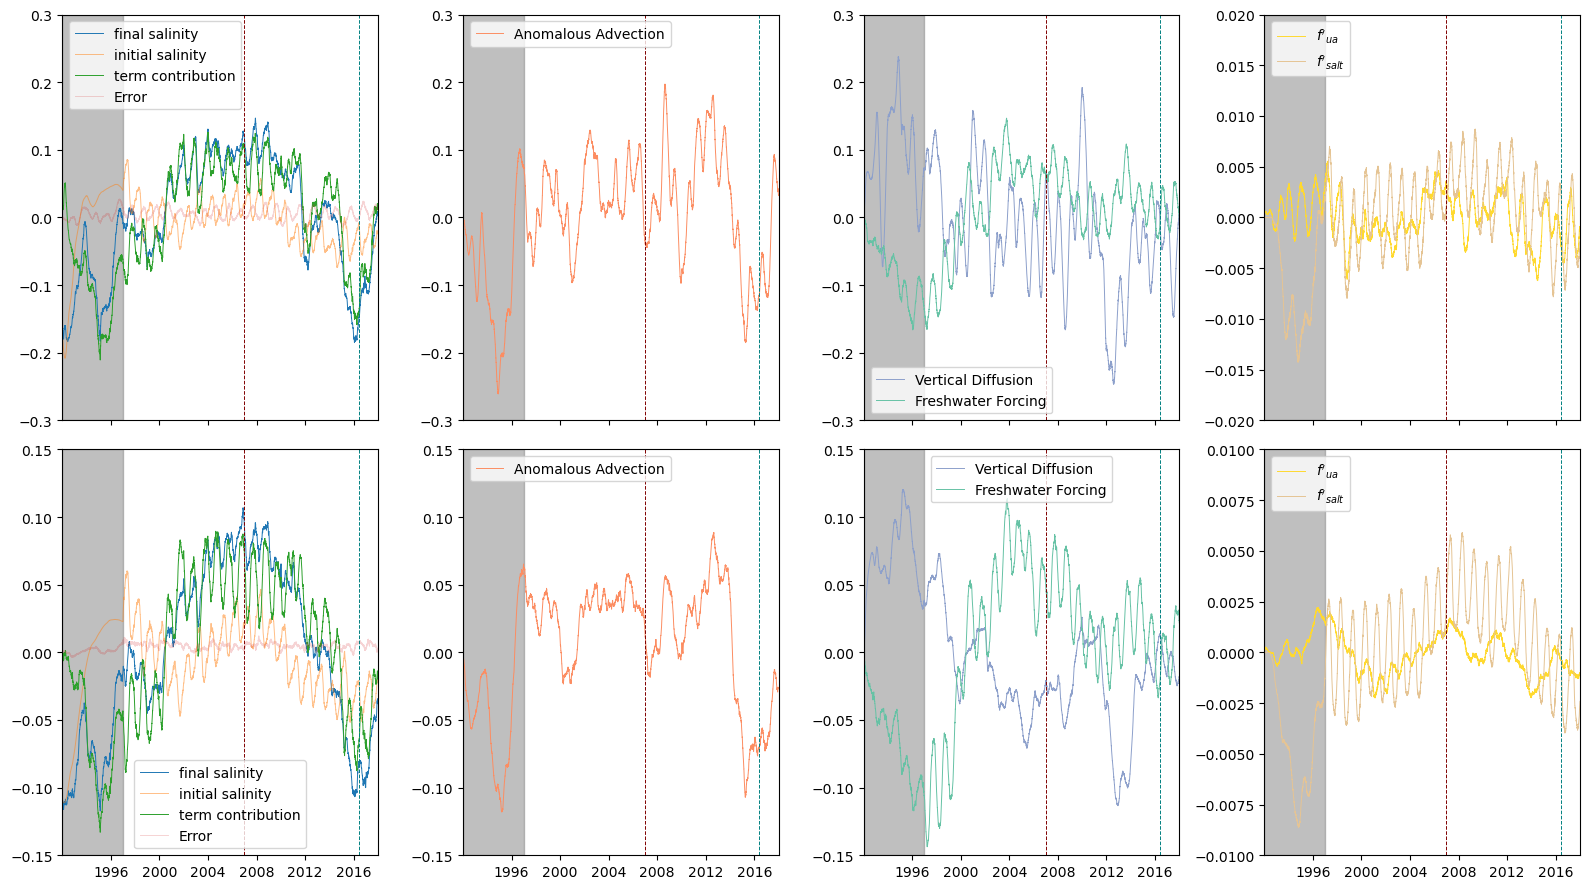

In [21]:
ttt = rtime
fig,axs = plt.subplots(2,4, figsize = (16,9),sharex = True)
fontsize = 10
axs = axs.ravel()
ylim = 0.3
small_ylim = 0.02

axs[0].plot(t,slast4,label = 'final salinity')
axs[0].plot(t,sfirst4, label = 'initial salinity',alpha = 0.5)
axs[0].plot(t,-sums4[1:]/NUMBER_OF_PARTICLE_domain4, label = 'term contribution')
axs[0].plot(t,slast4-sfirst4+sums4[1:]/NUMBER_OF_PARTICLE_domain4,label = 'Error',alpha = 0.2)
axs[0].legend(fontsize = fontsize)
axs[0].fill_betweenx([-ylim,ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
axs[0].set_ylim([-ylim,ylim])
axs[0].set_xlim([t[0],t[-1]])
axs[0].plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
axs[0].plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)

for i,group in enumerate([['A'],['dif_v','F'],['e_ua','I']]):
    for var in group:
        axs[i+1].plot(ttt, -terms4[var]/NUMBER_OF_PARTICLE_domain4,label = term_dic[var],color = color_dic_mean[var])
    axs[i+1].legend(fontsize = fontsize)
    if i!=2:
        axs[i+1].fill_betweenx([-ylim,ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
        axs[i+1].set_ylim([-ylim,ylim])
        axs[i+1].plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
        axs[i+1].plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)
    else:
        axs[i+1].fill_betweenx([-small_ylim,small_ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
        axs[i+1].set_ylim([-small_ylim,small_ylim])
        axs[i+1].plot([salty_date,salty_date],[-small_ylim,small_ylim],'--', color = salty_theme_color)
        axs[i+1].plot([fresh_date,fresh_date],[-small_ylim,small_ylim],'--', color = fresh_theme_color)

ylim = 0.15
small_ylim = 0.01

axs[4].plot(t,slasta,label = 'final salinity')
axs[4].plot(t,sfirsta, label = 'initial salinity',alpha = 0.5)
axs[4].plot(t,-sumsa[1:]/NUMBER_OF_PARTICLE_domain_all, label = 'term contribution')
axs[4].plot(t,slasta-sfirsta+sumsa[1:]/NUMBER_OF_PARTICLE_domain_all,label = 'Error',alpha = 0.2)
axs[4].legend(fontsize = fontsize)
axs[4].fill_betweenx([-ylim,ylim],t[0],t[1825],color = 'grey',alpha = 0.5)
axs[4].set_ylim([-ylim,ylim])
axs[4].set_xlim([t[0],t[-1]])
axs[4].plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
axs[4].plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)

for i,group in enumerate([['A'],['dif_v','F'],['e_ua','I']]):
    i+=4
    for var in group:
        axs[i+1].plot(ttt, -termsa[var]/NUMBER_OF_PARTICLE_domain_all,label = term_dic[var],color = color_dic_mean[var])
    axs[i+1].legend(fontsize = fontsize)
    if i!=6:
        axs[i+1].fill_betweenx([-ylim,ylim],t[0],t[1825],**fill_betweenx_kwarg)
        axs[i+1].set_ylim([-ylim,ylim])
        axs[i+1].plot([salty_date,salty_date],[-ylim,ylim],'--', color = salty_theme_color)
        axs[i+1].plot([fresh_date,fresh_date],[-ylim,ylim],'--', color = fresh_theme_color)
    else:
        axs[i+1].fill_betweenx([-small_ylim,small_ylim],t[0],t[1825],**fill_betweenx_kwarg)
        axs[i+1].set_ylim([-small_ylim,small_ylim])
        axs[i+1].plot([salty_date,salty_date],[-small_ylim,small_ylim],'--', color = salty_theme_color)
        axs[i+1].plot([fresh_date,fresh_date],[-small_ylim,small_ylim],'--', color = fresh_theme_color)

plt.tight_layout()
plt.savefig('talkfig9_0.png',dpi = dpi)

In [22]:
idate = 7364

print(t[idate])

2012-03-01T12:00:00.000000000


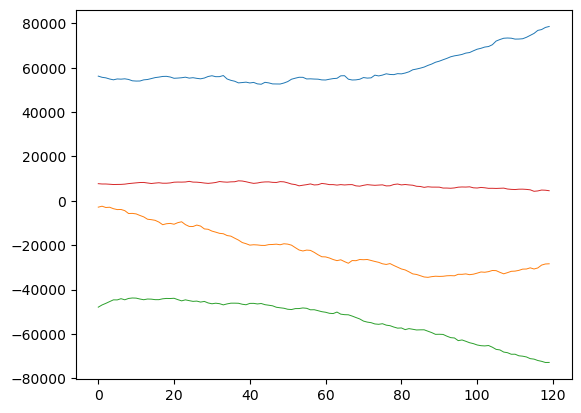

In [23]:
plt.plot(-termsa['A'][idate-60:idate+60])
plt.plot(-termsa['F'][idate-60:idate+60])
plt.plot(-termsa['dif_v'][idate-60:idate+60])
# plt.plot(-terms4['F'][idate-60:idate+60])
plt.plot(-termsa['E'][idate-60:idate+60])

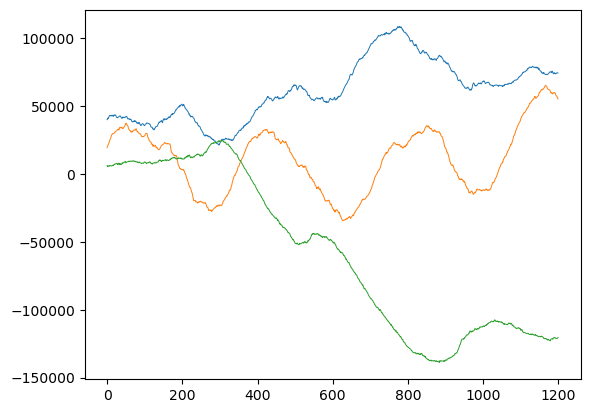

In [24]:
plt.plot(-termsa['A'][idate-600:idate+600])
plt.plot(-termsa['F'][idate-600:idate+600])
plt.plot(-termsa['dif_v'][idate-600:idate+600])

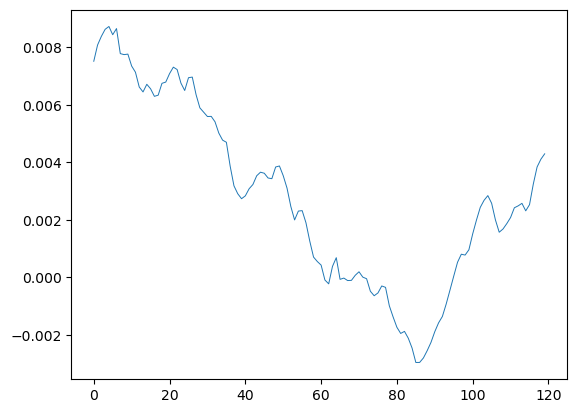

In [25]:
plt.plot(slasta[idate-60:idate+60])

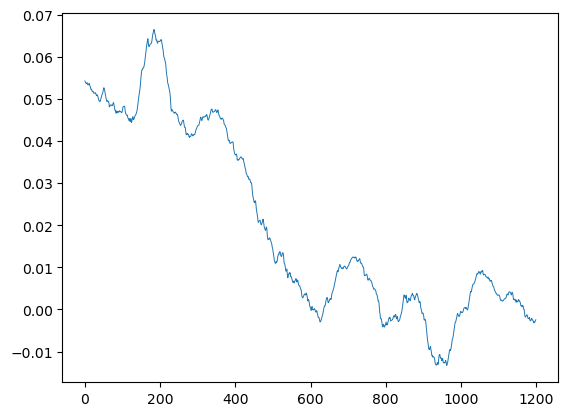

In [26]:
plt.plot(slasta[idate-600:idate+600])